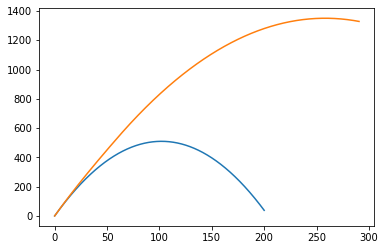

In [2]:
import numpy as np
import math
from matplotlib import pyplot as pp

MODEL_G = 9.81
MODEL_DT = 0.001

class Body:
    def __init__(self, x, y, vx, vy):

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

        self.trajectory_x = []
        self.trajectory_y = []

    def advance(self):
       
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)

        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT

class Rocket(Body):

    def __init__(self, x, y, wx, wy, ux, uy, mr, mo, dm):
        
        super().__init__(0, 0, 10, 100)
        
        self.x = x
        self.y = y
        self.mr = mr
        self.mo = mo
        self.wx = wx
        self.wy = wy
        self.ux = ux
        self.uy = uy
        self.dm = dm
        self.M = mr + mo

    def advance(self):
        super().advance()
        self.wx = self.vx - self.ux
        self.wy = self.vy - self.uy
        if self.dm < 0 and self.mo > 0:
            self.M += self.dm * MODEL_DT
            self.mo += self.dm * MODEL_DT
            if MODEL_DT * MODEL_G <= -((self.wy * self.dm) / (self.M)) * MODEL_DT:
                    self.vx += -((self.dm * self.wx) / self.M) * MODEL_DT
                    self.vy += -((self.dm * self.wy) / self.M) * MODEL_DT
            else:
                    self.vy -= MODEL_DT * MODEL_G
                                    
b = Body(0, 0, 10, 100)
r = Rocket(0, 0, 10, 10, 5, 5, 14, 15, -3)

bodies = [b, r]

for t in np.arange(0, 20, MODEL_DT):
    for b in bodies:
        b.advance()

for b in bodies:
    pp.plot(b.trajectory_x, b.trajectory_y)
pp.show()